In [203]:
# Natural Language Processing (NLP) - Text Mining, Auto Filling, Speech
# Tranlsation, Language Trabslation, Speech to Text, Voice Assistants,etc.
# NLP deals with text in the form of content, documents, tweets, updates,
# web pages, etc. 
# Text data is unsupervised learning data.
# Preprocessing of Text data is the biggest challenge. Special characters,
# punctiations, digits, stop words, emojis , etc must be cleaned for
# getting the core text.
# Text is taken as input primarily in the form of words also called as
# tokens. For some specific analysis like Sentiment Analysis, Sentence
# is the input format.

# Libraries for NLP in python
#1) nltk. 2) spacy 3) textblob 4) wordcloud

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [205]:
import requests
from bs4 import BeautifulSoup

In [206]:
# bs4 is a library is part of nltk for webscraping. Scraping content from
# webpages
wiki=requests.get('https://en.wikipedia.org/wiki/COVID-19')

In [207]:
covid=BeautifulSoup(wiki.content,'lxml')
# lxml is the html format used by wikipedia

In [208]:
covid=covid.getText(strip=True)

In [209]:
# Text preprocessing involves cleaning punctuations, special chracters,
# digits, etc.
# Normalization of Text - Stemming or Lemmitization
# Lexicons - predefined list of words used as reference

In [210]:
# Regular Expressions
import re

In [211]:
# Replace [1] with space - reference footnotes
covid=re.sub(r'\[\d+\]','',covid)

In [212]:
# Replace [a] with space
covid=re.sub(r'\[\w+\]','',covid)

In [213]:
# Replace (a) with space
covid=re.sub(r'\(\w+\)','',covid)

In [214]:
# Replace digits with space
covid=re.sub('[0-9]+','', covid)

In [215]:
# Remove both () & []
covid=re.sub('[\(\[].*?[\)\]]','',covid)

In [216]:
# Tokenization - Converting Text to either sentences or words
# Sentence Tokenization - Break content into sentences, delimiter is
# fullstop
# Word Tokenization - Breking content into words, delimiter is space.

In [217]:
from nltk.tokenize import sent_tokenize,word_tokenize

In [218]:
sentences=sent_tokenize(covid)

In [219]:
len(sentences)

975

In [220]:
# TextBlob based Sentiment Analysis . Generate 2 metrics
# Polarity Score is a float between -1 to 1. Polarity score is calculated
# based on positive/negative words by comparing with respective lexicons
# of positive/negative words.
# Subjectivity Score is between 0 to 1. and closer to 1 indicates high
# personal opinion without factual information and closer to 0 indicates
# low personal opinion with factual information

In [221]:
from textblob import TextBlob

In [222]:
s1=TextBlob("Tendulkar is greatest batsman in cricket")

In [223]:
s1.sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

In [224]:
s2=TextBlob("tendulakar scored 25000 runs great batsman in the world")

In [225]:
s2.sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

In [226]:
def analyze_sentiment(text):
    analysis=TextBlob(text)
    if analysis.sentiment.polarity>0:
        return 'Positive'
    elif analysis.sentiment.polarity==0:
        return 'Neutral'
    else:
        return 'Negative'

In [272]:
sentences_df=pd.DataFrame(sentences)

In [273]:
sentences_df.columns=['sentences']

In [274]:
sentences_df['sentiment']=[str(analyze_sentiment(x))
                              for x in sentences_df.sentences]

In [275]:
sentences_df.sentiment.value_counts()

Neutral     656
Positive    241
Negative     78
Name: sentiment, dtype: int64

In [276]:
covidwords=word_tokenize(covid)

In [277]:
covidwords=[w for w in covidwords if w.isalnum()]

In [278]:
from nltk.corpus import stopwords

In [279]:
stop_words=set(stopwords.words("english"))

In [280]:
covidwords=[w for w in covidwords if not str.lower(w) in stop_words]

In [281]:
covidwords=[w.lower() for w in covidwords]

In [282]:
covidwords=[w for w in covidwords if len(w)>2]

In [283]:
from nltk.probability import FreqDist

In [284]:
wordfreq=FreqDist(covidwords)

In [285]:
wordfreq.most_common(50)

[('retrieved', 199),
 ('disease', 168),
 ('coronavirus', 153),
 ('health', 102),
 ('control', 83),
 ('may', 81),
 ('people', 80),
 ('virus', 78),
 ('prevention', 75),
 ('patients', 63),
 ('infection', 60),
 ('respiratory', 59),
 ('review', 59),
 ('original', 58),
 ('risk', 57),
 ('transmission', 53),
 ('symptoms', 52),
 ('february', 50),
 ('severe', 48),
 ('treatment', 46),
 ('cases', 45),
 ('clinical', 45),
 ('journal', 45),
 ('china', 43),
 ('pandemic', 42),
 ('new', 42),
 ('medicine', 40),
 ('march', 38),
 ('december', 37),
 ('also', 37),
 ('use', 36),
 ('infected', 36),
 ('covid', 36),
 ('wuhan', 35),
 ('systematic', 33),
 ('organization', 32),
 ('spread', 31),
 ('novel', 30),
 ('mortality', 28),
 ('diseases', 28),
 ('syndrome', 28),
 ('january', 28),
 ('medical', 28),
 ('april', 28),
 ('research', 27),
 ('public', 27),
 ('acute', 26),
 ('one', 26),
 ('first', 25),
 ('wang', 25)]

In [286]:
from wordcloud import WordCloud

In [287]:
covid_words=(" ").join(covidwords)

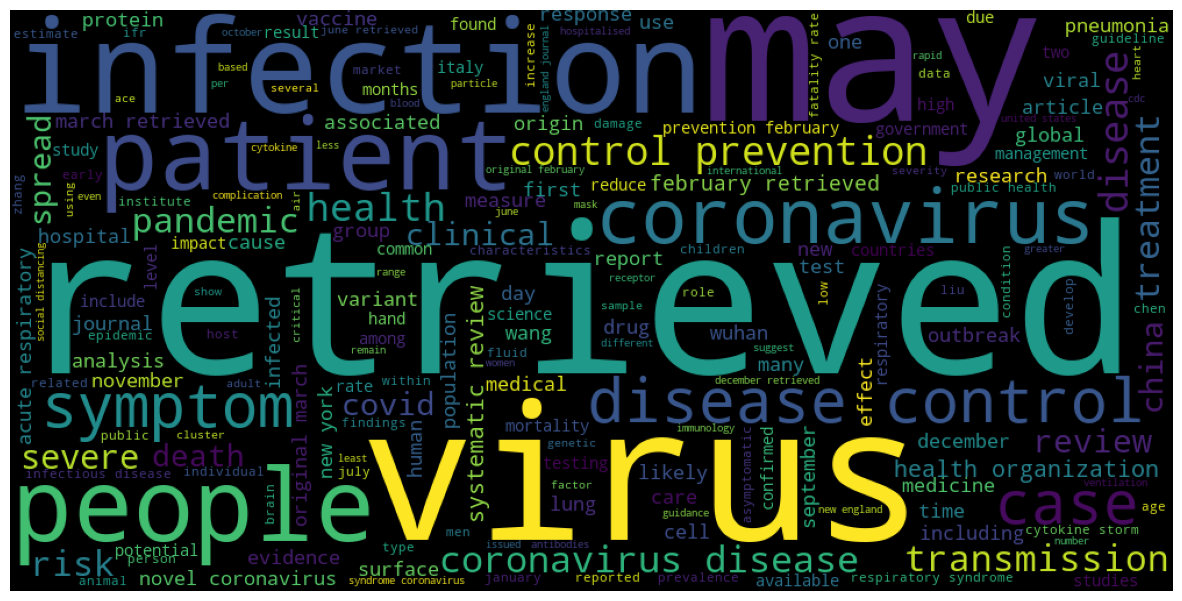

In [288]:
wordcloud=WordCloud(width=1000,height=500).generate(covid_words)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [289]:
# Post Preprocessing text - Data will be in the form of words or tokens.
# Words or tokens must be converted to numbers for input into Machine
# Learning Algorithms.

# 2 Matrices can be created - Document Term Matrix or Term Document Matrix

# Document/Sentence/Tweet Term Matrix - Terms or Words or Tokens will be
# in Columns and Document/Sentence/Tweet in Rows

# Term Document/Sentence/Tweet Matrix - Terms or Words or Tokens will be
# in Rows and Document/Sentence/Tweet in Columns

# Term Frequency Inverse Document Frequency Matrix - Probability is 
# calculated based on Terms or Words or Tokens and Document/Sentence/Tweet

# All 3 Matrices are Sparse Matrices (many Zeroes in matrix)
# from sklearn.feature_extraction.text import CountVectorizer 
# Document Term Matrix

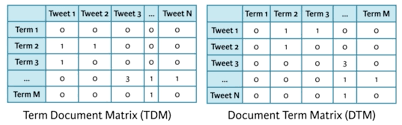

In [290]:
from sklearn.feature_extraction.text import CountVectorizer

In [291]:
DTM=CountVectorizer(max_features=200)

In [292]:
X=DTM.fit_transform(covidwords)

In [293]:
X.shape

(13110, 200)

In [294]:
pd.DataFrame(X.toarray(),columns=DTM.vocabulary_).tail(10)

,article,cause,host,factors,virus,cytokine,prevention,masks,respiratory,control,...,science,medicine,virology,wang,zhang,liu,england,chen,update,news
13100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [295]:
# Term Document Matrix
DTM_dense=pd.DataFrame(X.todense())

In [296]:
TDM=DTM_dense.T # Transpose

In [297]:
# Term Frequency Inverse Document Frequecny (TFIDF) Matrix
# TFIDF uses probability calculations and creates a matrix

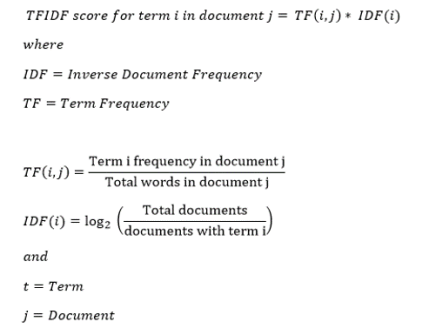

In [298]:
# The car is driven on the road
# The truck is driven on the highway

# Post Preprocessing
# S1 - car, driven, on, road
# S2 - truck, driven, on, highway

# TFIDF for term "car"
# Term Frequency "car" - 1/4 = 0.25
# Inverse Document Frequency "car" - log(2/1) = log(2) = 0.6931
# TFIDF of "car" - 0.25 * 0.6931 = 0.173

# TFIDF for term "driven"
# Term Frequency "driven" - 1/4 *1/4 = 0.25 * 0.25 = 0.0625
# Inverse Document Frequency "driven" - log(2/2) = log(1) =0
# TFIDF "driven" = 0.0625 *0=0

In [299]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [300]:
tfidf=TfidfVectorizer(max_features=200)

In [301]:
X_tfidf=tfidf.fit_transform(covidwords)

In [302]:
pd.DataFrame(X_tfidf.toarray(),columns=tfidf.vocabulary_).tail(20)

,article,cause,host,factors,virus,cytokine,prevention,masks,respiratory,control,...,science,medicine,virology,wang,zhang,liu,england,chen,update,news
13090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [305]:
sentences_df.head()

,sentences,sentiment
0,COVID- - WikipediaJump to contentToggle sideba...,Positive
1,"For other diseases caused by coronaviruses, se...",Positive
2,"The first known case wasidentified in Wuhan, C...",Positive
3,At least a third of people who are infecteddo ...,Positive
4,Some people continue to experience a range of ...,Neutral


In [259]:
sentences_df_lower=sentences_df.sentences.str.lower()

In [304]:
sentences_df_lower=pd.DataFrame(sentences_df_lower,columns=sentences_df.columns)

In [306]:
sentences_df_lower['sentiment']=sentences_df.sentiment

In [307]:
sentences_df_lower.head()

,sentences,sentiment
0,covid- - wikipediajump to contenttoggle sideba...,Positive
1,"for other diseases caused by coronaviruses, se...",Positive
2,"the first known case wasidentified in wuhan, c...",Positive
3,at least a third of people who are infecteddo ...,Positive
4,some people continue to experience a range of ...,Neutral


In [308]:
tfidf=TfidfVectorizer(stop_words=stop_words,max_features=200,
                     ngram_range=(2,2))

In [309]:
sentence_tfidf=tfidf.fit_transform(sentences_df.sentences)

In [310]:
pd.DataFrame(sentence_tfidf.toarray(),columns=tfidf.vocabulary_).head()

,sars cov,nervous system,viral host,face masks,social distancing,international travel,risk factors,case fatality,fatality rate,infection fatality,...,text source,source thepublic,thepublic domain,antibody therapeutics,june july,per capita,containing potentially,potentially dated,dated statements,articles containing
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.2522,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.355761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [311]:
from sklearn.preprocessing  import LabelEncoder

In [313]:
sentences_df_lower.head()

,sentences,sentiment
0,covid- - wikipediajump to contenttoggle sideba...,Positive
1,"for other diseases caused by coronaviruses, se...",Positive
2,"the first known case wasidentified in wuhan, c...",Positive
3,at least a third of people who are infecteddo ...,Positive
4,some people continue to experience a range of ...,Neutral


In [314]:
y=sentences_df_lower.sentiment
X=sentence_tfidf

In [315]:
y=LabelEncoder().fit_transform(y)

In [316]:
from sklearn.linear_model import LogisticRegression

In [317]:
logitmodel=LogisticRegression(multi_class="multinomial").fit(X,y)

In [318]:
logitmodel.score(X,y)

0.8133333333333334

In [319]:
logitpredict=logitmodel.predict(X)

In [320]:
pd.crosstab(y,logitpredict)

col_0,0,1,2
row_0,,,
0,1,59,18
1,0,651,5
2,0,100,141


In [327]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

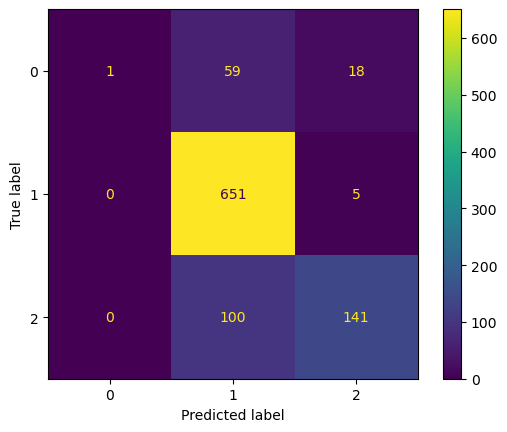

In [326]:
ConfusionMatrixDisplay.from_predictions(y,logitpredict)

In [328]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       1.00      0.01      0.03        78
           1       0.80      0.99      0.89       656
           2       0.86      0.59      0.70       241

    accuracy                           0.81       975
   macro avg       0.89      0.53      0.54       975
weighted avg       0.83      0.81      0.77       975



In [329]:
from sklearn.tree import DecisionTreeClassifier

In [330]:
treemodel=DecisionTreeClassifier().fit(X,y)

In [331]:
treemodel.score(X,y)

0.9056410256410257

In [332]:
treepredict=treemodel.predict(X)

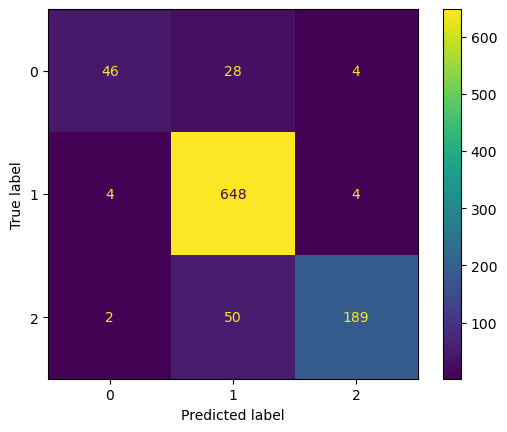

In [333]:
ConfusionMatrixDisplay.from_predictions(y,treepredict)